## Original GPLVM alignment model with default settings

In [1]:
import matplotlib.pyplot as plt
%pylab inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

np.random.seed(3)
from Alignment import *
from get_data import *

Populating the interactive namespace from numpy and matplotlib


/home/ik359/Environments/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Text(0.5, 1.0, 'Unaligned signals (+ = noisy samples)')

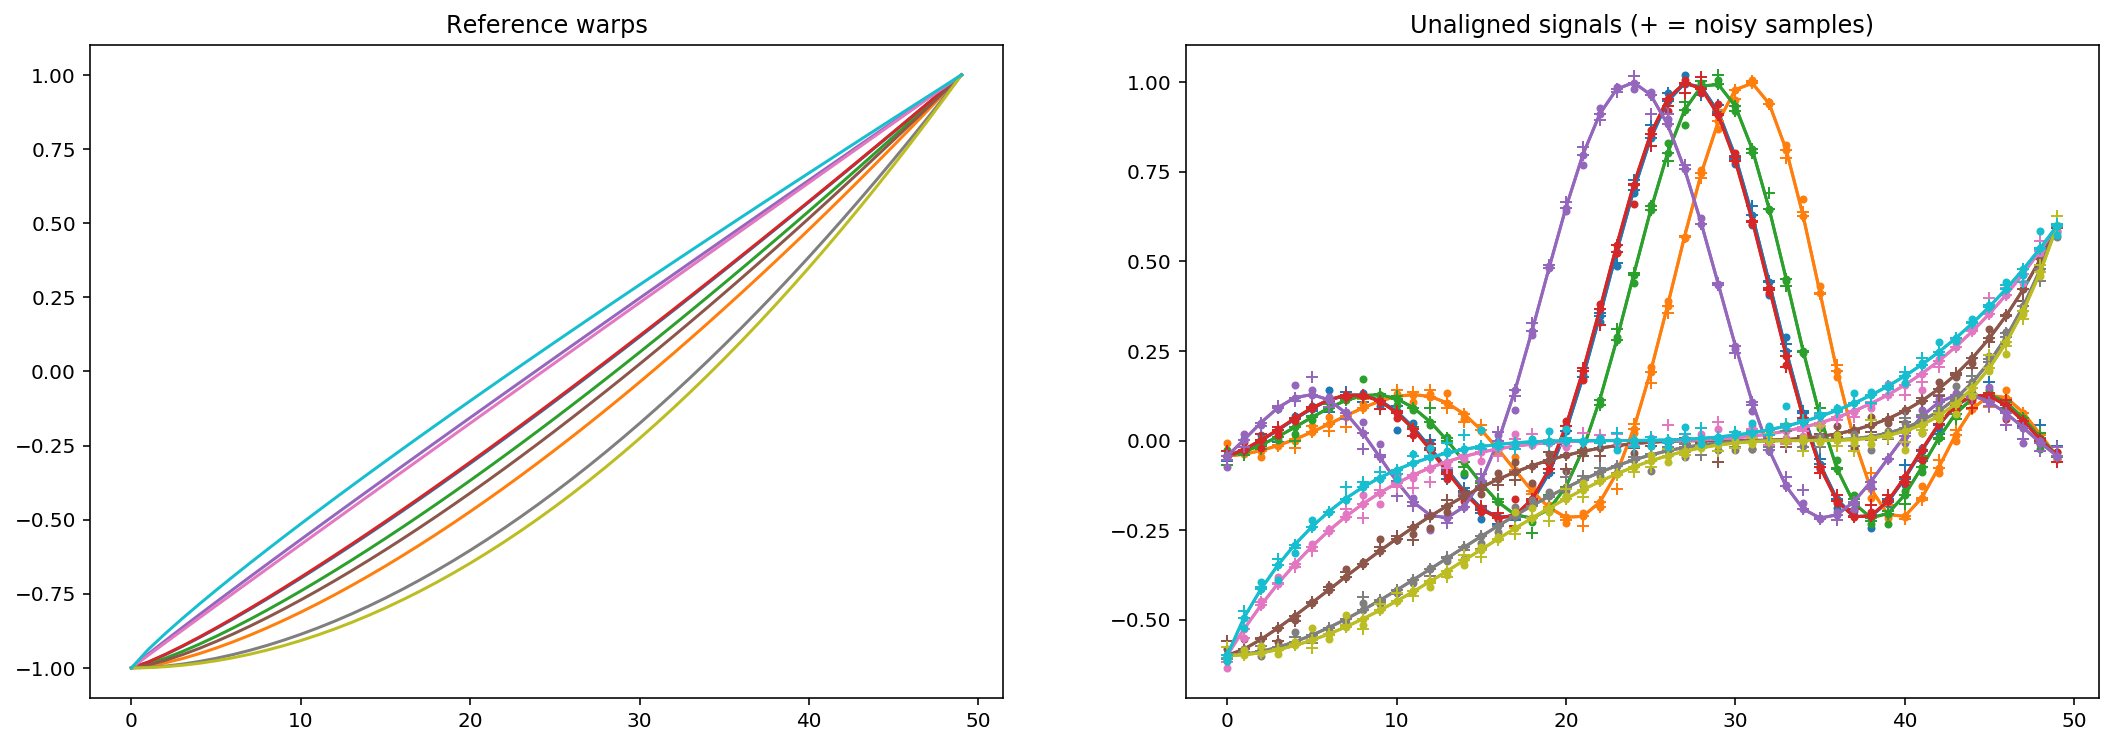

In [2]:
D = 2  # = num output dimensions
N_seq = 10
N_samples = 50
noise_std = 0.02

np.random.seed(0)
x_ref, y_ref, y_ref_noise_free = get_data(N_seq=N_seq,
                                          N_samples=N_samples,
                                          D=D,
                                          noise_std=noise_std)

plt.figure(figsize=[18, 6])
ax = plt.subplot(1, 2, 1)
for x in x_ref:
    ax.plot(x)
plt.title('Reference warps')

def get_marker(d):
    markers = ['.', '+', ',', '-', '*', 'o']
    return markers[d % len(markers)]

ax = plt.subplot(1, 2, 2)
for yn, y, c in zip(y_ref, y_ref_noise_free, sns.color_palette(n_colors=N_seq)):
    for d in range(D):
        ax.plot(y[:, d], '-', color=c, marker=get_marker(d))
        ax.plot(yn[:, d], '+', color=c, marker=get_marker(d))
plt.title('Unaligned signals (+ = noisy samples)')

kernel_for_function =  sq_exp
use_energy_version =  False
use_shared_beta =  True
use_shared_gamma =  False
weights_prior_coeff =  1.0
use_extra_gp_prior_over_warp =  True
learning_rate =  0.01
num_iterations =  1500
use_zero_mean_Y_aligned =  True
N_aligned_samples =  50
use_sparse_gp =  False

Running Optimisation!

  opt iter     0: 5129.0995972507735
  opt iter   150: 1795.9733163407695
  opt iter   300: -545.0821637852636
  opt iter   450: -2689.910970692939
  opt iter   600: -4925.713002040682
  opt iter   750: -6811.382772858753
  opt iter   900: -8075.534942923549
  opt iter  1050: -8882.123656299002
  opt iter  1200: -9526.597835134184
  opt iter  1350: -10044.195969501856
Final iter  1499: -9349.852514152437
Time to optimise: 17.533624410629272 s

Alignment GP  alpha =  0.023  gamma =  0.481  beta = 455274.360 (0.001)
      GP   1  alpha =  0.399  gamma = 10.932  beta = 4535.950 (0.015)
      GP   2  alpha =  0.366  gamma = 11.492  beta = 4535.950 (0.015)
      GP   3  alpha 

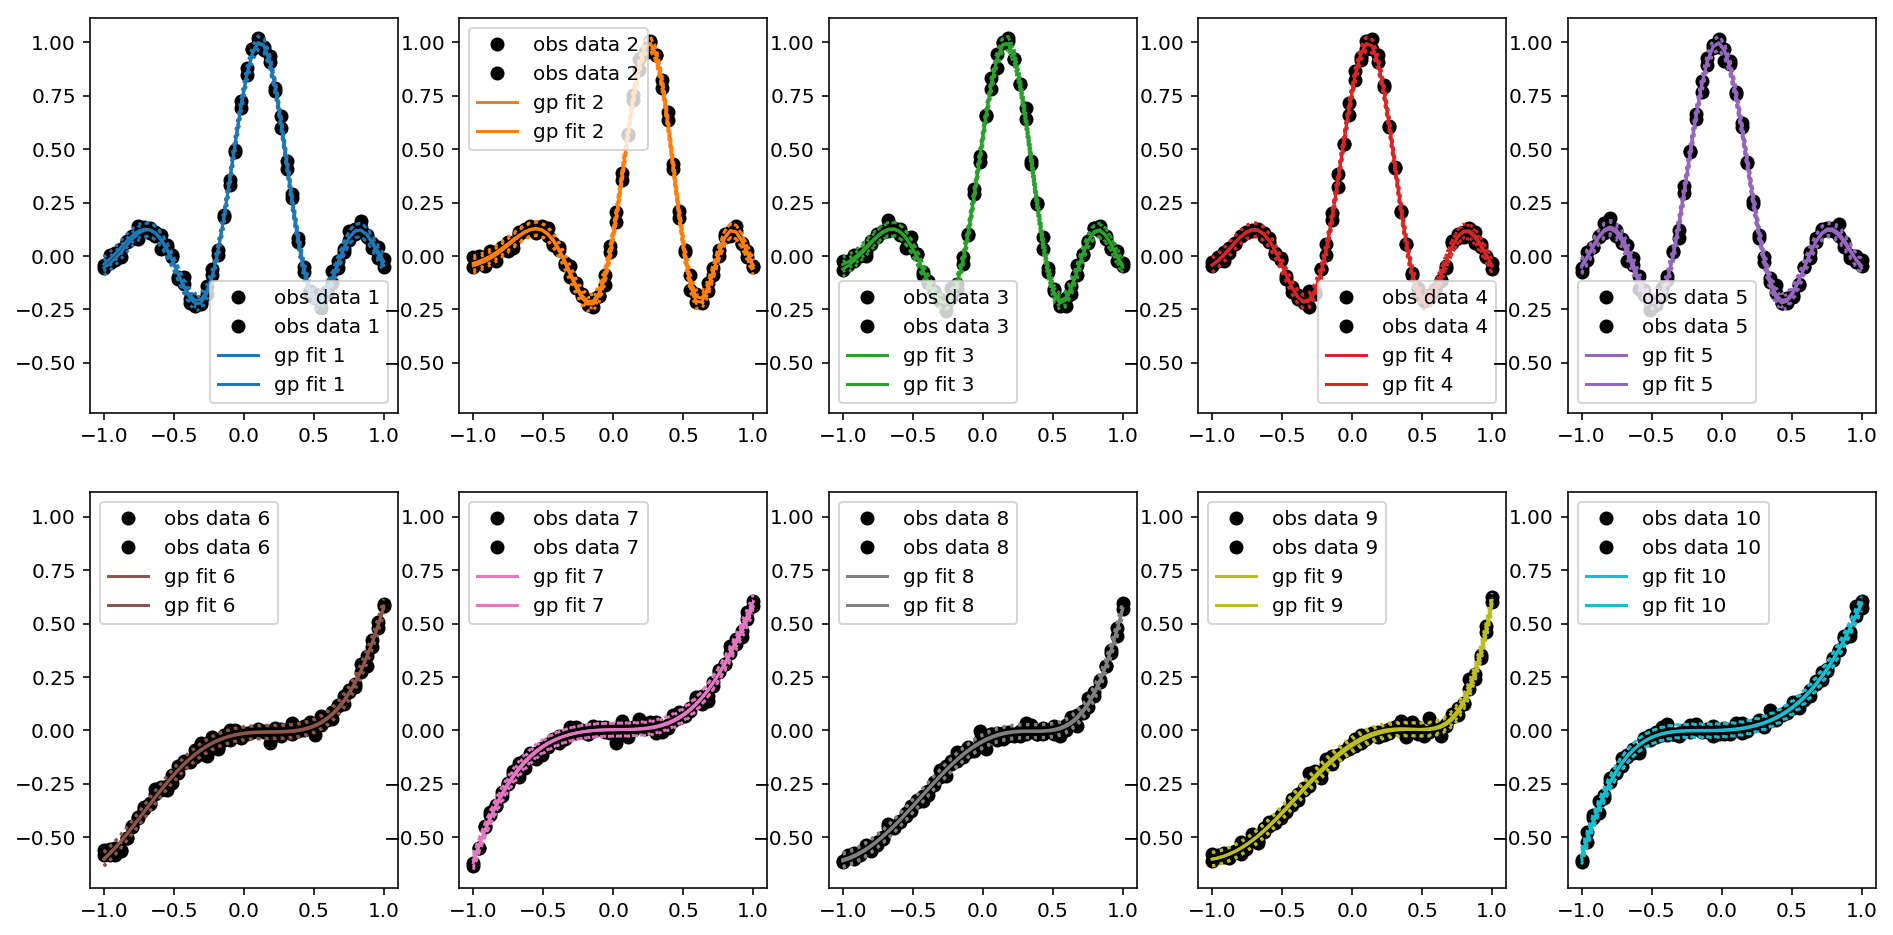

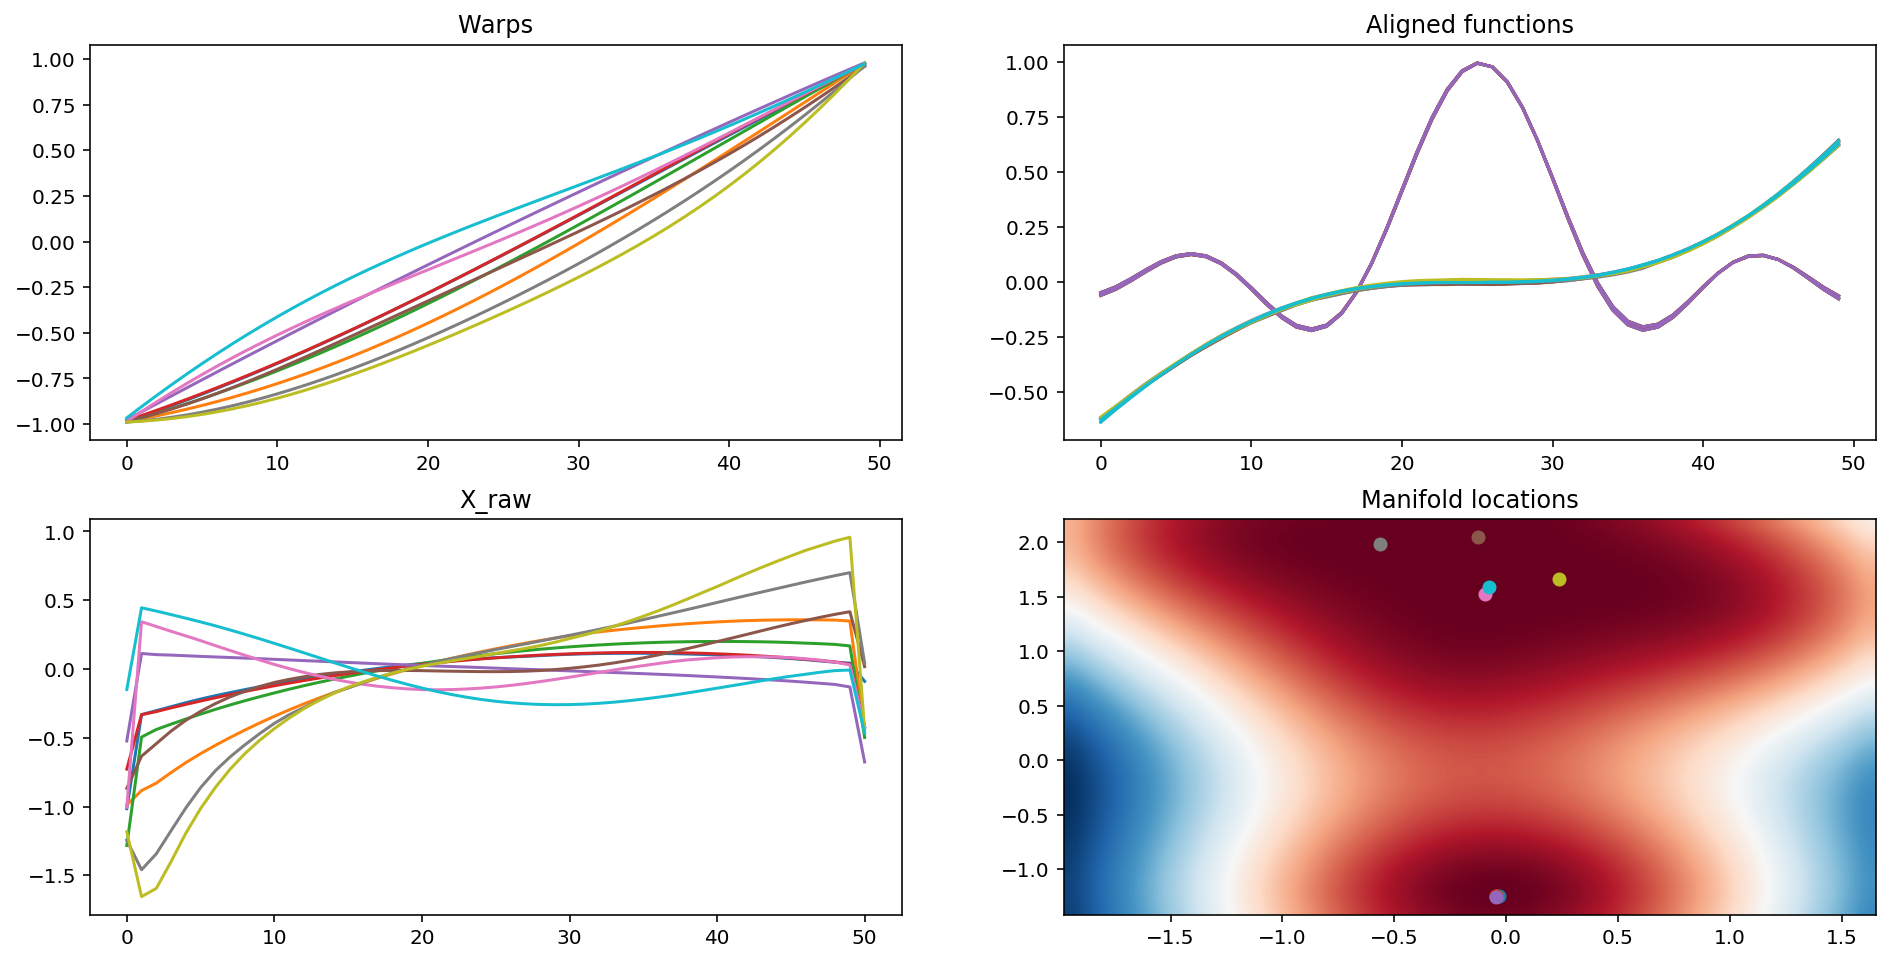

In [6]:
use_shared_beta = True # Use shared noise parameter for all of the N_seq sequences
use_extra_gp_prior_over_warp = True # Ensure the warps are smooth
use_energy_version = False # Use L2 distance between pairs of sequences rather than GPLVM as alignment objective
use_zero_mean_Y_aligned = True # Normalise data
use_sparse_gp = False # Use sparse GP approx for the sequences


# Optimisation parameters
learning_rate = 0.01
num_iterations = 1500

gps, alignment_gp, t_objective = \
    test_align_full_gp_with_gp_or_energy(x_ref, y_ref,
                                         use_shared_beta=use_shared_beta,
                                         use_extra_gp_prior_over_warp=use_extra_gp_prior_over_warp,
                                         use_energy_version=use_energy_version,
                                         learning_rate=learning_rate,
                                         num_iterations=num_iterations,
                                         use_zero_mean_Y_aligned=use_zero_mean_Y_aligned,
                                         use_sparse_gp=use_sparse_gp)

# The cell below just runs a GPLVM on the unaligned data for comparison

(10, 100)

Running Optimisation!

  opt iter     0: 1188.2857023291904
  opt iter   120: 113.61583644190073
  opt iter   240: -487.82425673205904
  opt iter   360: -873.4156132198173
  opt iter   480: -1036.2835083679877
  opt iter   600: -1056.7856220304052
  opt iter   720: -1057.708841855932
  opt iter   840: -1056.8715313300659
  opt iter   960: -1057.9834548636327
  opt iter  1080: -1057.3222405333986
Final iter  1199: -1058.1209291624168
Time to optimise: 0.7867295742034912 s


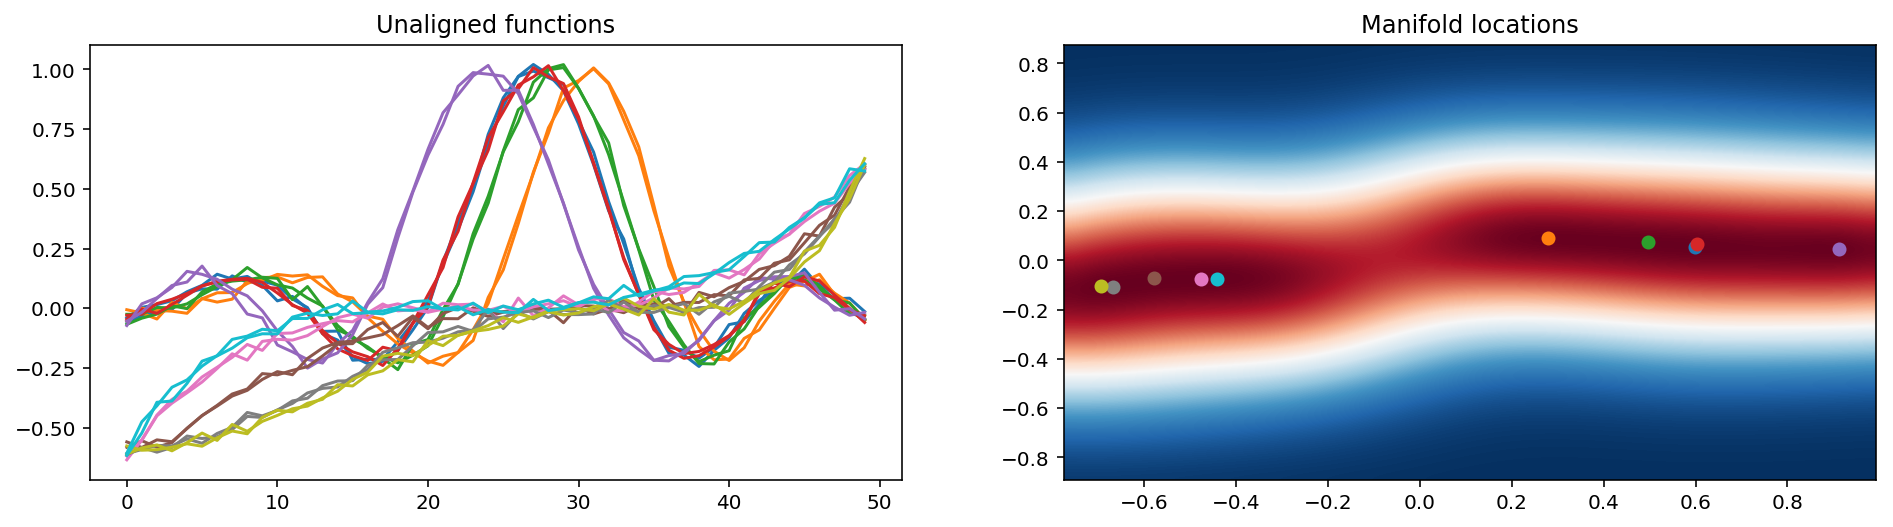

In [5]:
learning_rate = 0.02
num_iterations = 1200
use_zero_mean_Y = True

alignment_gp, t_objective = perform_gplvm_unaligned_data(y_ref,
                                                         learning_rate=learning_rate,
                                                         num_iterations=num_iterations,
                                                         use_zero_mean_Y=use_zero_mean_Y)